# Przeprowadzenie testów odnośnie rozmiarów:
**okna poolingu** i typu poolingu

In [7]:
from utils import get_prepared_data, get_layers_info, set_plt
from tensorflow import keras
from tensorflow.python.keras import layers
from constants import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import datetime;

In [8]:
(x_train, y_train), (x_test, y_test) = get_prepared_data()
input_picture_shape = x_train.shape[1:]
num_classes = y_train.shape[1]
input_picture_shape

(28, 28, 1)

In [9]:
all_models = []
all_descriptions = []
all_titles = []

changed_param = "pool_size"
for pool_size in [3, 6, 12, 15, 20]:
    model_layers = [
        keras.Input(shape=input_picture_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation=ACT_RELU),
        layers.MaxPooling2D(pool_size=(pool_size, pool_size), strides=1),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
    model = keras.Sequential(model_layers)
    all_models.append(model)
    all_titles.append(pool_size)
    all_descriptions.append(get_layers_info(model_layers))
all_descriptions

[0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (3, 3)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor                                                       
 2  1        Conv2D      32      (3, 3)       relu                        
 3  2  MaxPooling2D                                   (6, 6)  (1, 1)      
 4  3       Flatten                                                       
 5  4         Dense                                                     10,
 0  n          type filters kernel_size activation pool_size strides units
 1  0   KerasTensor    

In [10]:
for model in all_models:
    model.compile(loss="categorical_crossentropy", optimizer=OPT_RMS_PROP, metrics=["accuracy"])

In [11]:
batch_size = 128
epochs = 10
all_history = []
for model in tqdm(all_models, colour="RED"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    all_history.append(history)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1995 - accuracy: 0.9411 - val_loss: 0.0852 - val_accuracy: 0.9736
Epoch 2/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.0598 - val_accuracy: 0.9807
Epoch 3/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0460 - val_accuracy: 0.9851
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0445 - val_accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.0465 - val_accuracy: 0.9849
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0288 - accuracy: 0.9921 - val_loss: 0.0458 - val_accuracy:

 20%|██        | 1/5 [02:18<09:14, 138.56s/it]

Epoch 1/10
469/469 [==============================] - 24s 51ms/step - loss: 0.2808 - accuracy: 0.9163 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0559 - val_accuracy: 0.9829
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0544 - val_accuracy: 0.9816
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0446 - val_accuracy: 0.9860
Epoch 5/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0342 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0473 - val_accuracy: 0.9855
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0382 - val_accuracy:

 40%|████      | 2/5 [05:53<09:10, 183.63s/it]

Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 0.4950 - accuracy: 0.8570 - val_loss: 0.1271 - val_accuracy: 0.9637
Epoch 2/10
469/469 [==============================] - 33s 71ms/step - loss: 0.1240 - accuracy: 0.9618 - val_loss: 0.0795 - val_accuracy: 0.9757
Epoch 3/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0868 - accuracy: 0.9734 - val_loss: 0.0622 - val_accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0714 - accuracy: 0.9775 - val_loss: 0.0663 - val_accuracy: 0.9781
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0553 - val_accuracy: 0.9814
Epoch 6/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0461 - val_accuracy: 0.9845
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0491 - accuracy: 0.9841 - val_loss: 0.0536 - val_accuracy:

 60%|██████    | 3/5 [11:28<08:25, 252.71s/it]

Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 0.9216 - accuracy: 0.7151 - val_loss: 0.3729 - val_accuracy: 0.8853
Epoch 2/10
469/469 [==============================] - 33s 69ms/step - loss: 0.2982 - accuracy: 0.9099 - val_loss: 0.2152 - val_accuracy: 0.9362
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.2029 - accuracy: 0.9373 - val_loss: 0.1661 - val_accuracy: 0.9504
Epoch 4/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1591 - accuracy: 0.9505 - val_loss: 0.2328 - val_accuracy: 0.9198
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1349 - accuracy: 0.9583 - val_loss: 0.1336 - val_accuracy: 0.9583
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1181 - accuracy: 0.9631 - val_loss: 0.1275 - val_accuracy: 0.9597
Epoch 7/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1072 - accuracy: 0.9660 - val_loss: 0.1302 - val_accuracy:

 80%|████████  | 4/5 [16:56<04:42, 282.48s/it]

Epoch 1/10
469/469 [==============================] - 21s 44ms/step - loss: 1.5207 - accuracy: 0.5251 - val_loss: 0.9522 - val_accuracy: 0.7414
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.7896 - accuracy: 0.7621 - val_loss: 0.6882 - val_accuracy: 0.7889
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.6159 - accuracy: 0.8081 - val_loss: 0.5995 - val_accuracy: 0.8006
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.5360 - accuracy: 0.8305 - val_loss: 0.5396 - val_accuracy: 0.8211
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.4851 - accuracy: 0.8460 - val_loss: 0.5517 - val_accuracy: 0.8124
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.4522 - accuracy: 0.8566 - val_loss: 0.4110 - val_accuracy: 0.8782
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.4257 - accuracy: 0.8644 - val_loss: 0.3893 - val_accuracy:

100%|██████████| 5/5 [20:19<00:00, 243.96s/it]


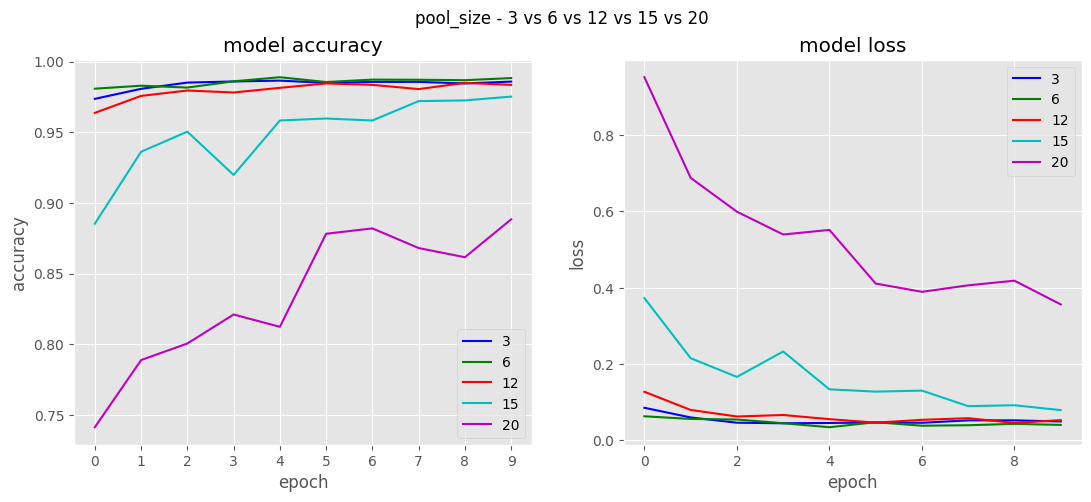

In [12]:
all_title =  f"{changed_param} - " + " vs ".join([str(x) for x in all_titles])
set_plt(all_history, all_titles, all_title)
all_title += f"_{datetime.datetime.now()}"
plt.savefig(f'plots/{all_title}.png')
plt.show()
for i, df in enumerate(all_descriptions):
    df.to_csv(Path(f"csvs/{all_title}_{i}.csv"), index=False)